### [데이터기반 시각화]
- 데이터 : 남북한발전전력.xlsx
- 남북한 수력발전전력량에 대한 시각화

(1) 모듈 로딩

In [6]:
import matplotlib.pyplot as plt                # 그래프 관련 모듈
import matplotlib as mpl                       # 패키지 관련
import matplotlib.font_manager as fm           # 패키지 리소스 즉 자원 중 폰트 관련 모듈
import pandas as pd
import numpy as np

(2) 데이터 준비

In [7]:
file = './남북한발전전력량.xlsx'

- 실제 데이터 파일 확인 결과
    * 첫번째 행은 컬럼명 데이터
    * 첫번째와 두번째 컬럼을 행 인덱스 사용으로 적합
    * 입력값이 없는 셀에 '-' 채워져 있음 => isnull()/isna()로는 결측치 체크 X
      - 삭제하지 않고 대체로 처리 => 대체값 0

(3) 데이터 저장 : EXCEL => DataFrame

In [8]:
korpowerDF = pd.read_excel(file, index_col=[0,1])

(4) 데이터 확인

- (4-1) 데이터 타입과 실제 데이터 체크
    * '-' 데이터를 '0'으로 변경
    * object 타입을 uint16 변경

In [9]:
korpowerDF.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    9 non-null      object
 1   1991    9 non-null      object
 2   1992    9 non-null      object
 3   1993    9 non-null      object
 4   1994    9 non-null      object
 5   1995    9 non-null      object
 6   1996    9 non-null      object
 7   1997    9 non-null      object
 8   1998    9 non-null      object
 9   1999    9 non-null      object
 10  2000    9 non-null      object
 11  2001    9 non-null      object
 12  2002    9 non-null      object
 13  2003    9 non-null      object
 14  2004    9 non-null      object
 15  2005    9 non-null      object
 16  2006    9 non-null      object
 17  2007    9 non-null      object
 18  2008    9 non-null      object
 19  2009    9 non-null      object
 20  2010    9 non-null      object
 21  2011    9 non-null      object
 22  2012   

In [10]:
korpowerDF.head()

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  

[5 rows x 27 columns]

- (4-2) 인덱스와 컬럼 속성 확인

In [11]:
print(korpowerDF.index, korpowerDF.columns, sep='\n\n')

MultiIndex([('남한',  '합계'),
            ('남한',  '수력'),
            ('남한',  '화력'),
            ('남한', '원자력'),
            ('남한', '신재생'),
            ('북한',  '합계'),
            ('북한',  '수력'),
            ('북한',  '화력'),
            ('북한', '원자력')],
           names=['전력량 (억㎾h)', '발전 전력별'])

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')


(5) 데이터 전처리

- (5-1) 데이터 자료형 변환 

In [12]:
# '-' => '0'
korpowerDF2 = korpowerDF.replace('-', 0)

In [13]:
# object => int16
korpowerDF2 = korpowerDF2.astype('int16')
korpowerDF2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    9 non-null      int16
 1   1991    9 non-null      int16
 2   1992    9 non-null      int16
 3   1993    9 non-null      int16
 4   1994    9 non-null      int16
 5   1995    9 non-null      int16
 6   1996    9 non-null      int16
 7   1997    9 non-null      int16
 8   1998    9 non-null      int16
 9   1999    9 non-null      int16
 10  2000    9 non-null      int16
 11  2001    9 non-null      int16
 12  2002    9 non-null      int16
 13  2003    9 non-null      int16
 14  2004    9 non-null      int16
 15  2005    9 non-null      int16
 16  2006    9 non-null      int16
 17  2007    9 non-null      int16
 18  2008    9 non-null      int16
 19  2009    9 non-null      int16
 20  2010    9 non-null      int16
 21  2011    9 non-null      int16
 22  2012    9 non-null      int16
 

(6) 데이터 분석 작업

- 남북한의 수력발전량량 비교하기

In [14]:
# 수력발전량 행 데이터 추출
waterDF = korpowerDF2.xs('수력', level=1)
waterDF.shape

(2, 27)

In [15]:
waterDF

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
전력량 (억㎾h),,,,,,,,,,,,,,,,,,,,,
남한,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
북한,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128


In [16]:
x = waterDF.columns
yn = waterDF.loc['북한']
ys = waterDF.loc['남한']

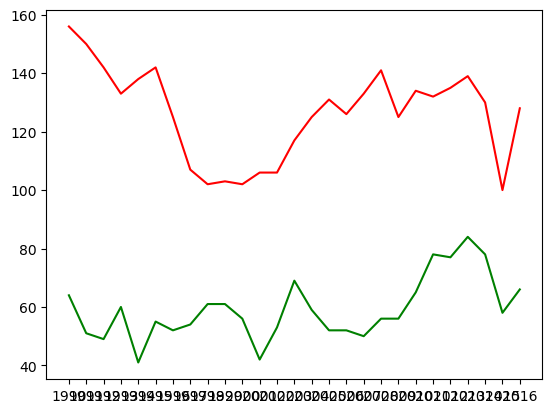

In [17]:
ret = plt.plot(x, yn, 'r', x, ys, 'g')

(7) 그래프 개편작업

In [18]:
font_path = r'C:\Windows\Fonts\gulim.ttc'
myFont = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=myFont)

In [19]:
waterDF.loc['북한'].max()

156

In [20]:
rwaterDF = waterDF.T
rwaterDF.reset_index(inplace=True, names='년도')
# 행열변환한 데이터프레임의 '북한' 열이 원래 데이터프레임의 '북한'열의 최고값인 경우의 데이터프레임을 뽑아서 그래프 가로축인 '년도'를 추출한다.
rwaterDF[rwaterDF['북한'] == waterDF.loc['북한'].max()].iloc[0]

전력량 (억㎾h)
년도    1990
남한      64
북한     156
Name: 0, dtype: object

In [21]:
rwaterDF[rwaterDF['남한'] == waterDF.loc['남한'].max()].iloc[0]    #이게 뭐하는 짓이지

전력량 (억㎾h)
년도    2013
남한      84
북한     139
Name: 23, dtype: object

Text(1994, 38, 'Min')

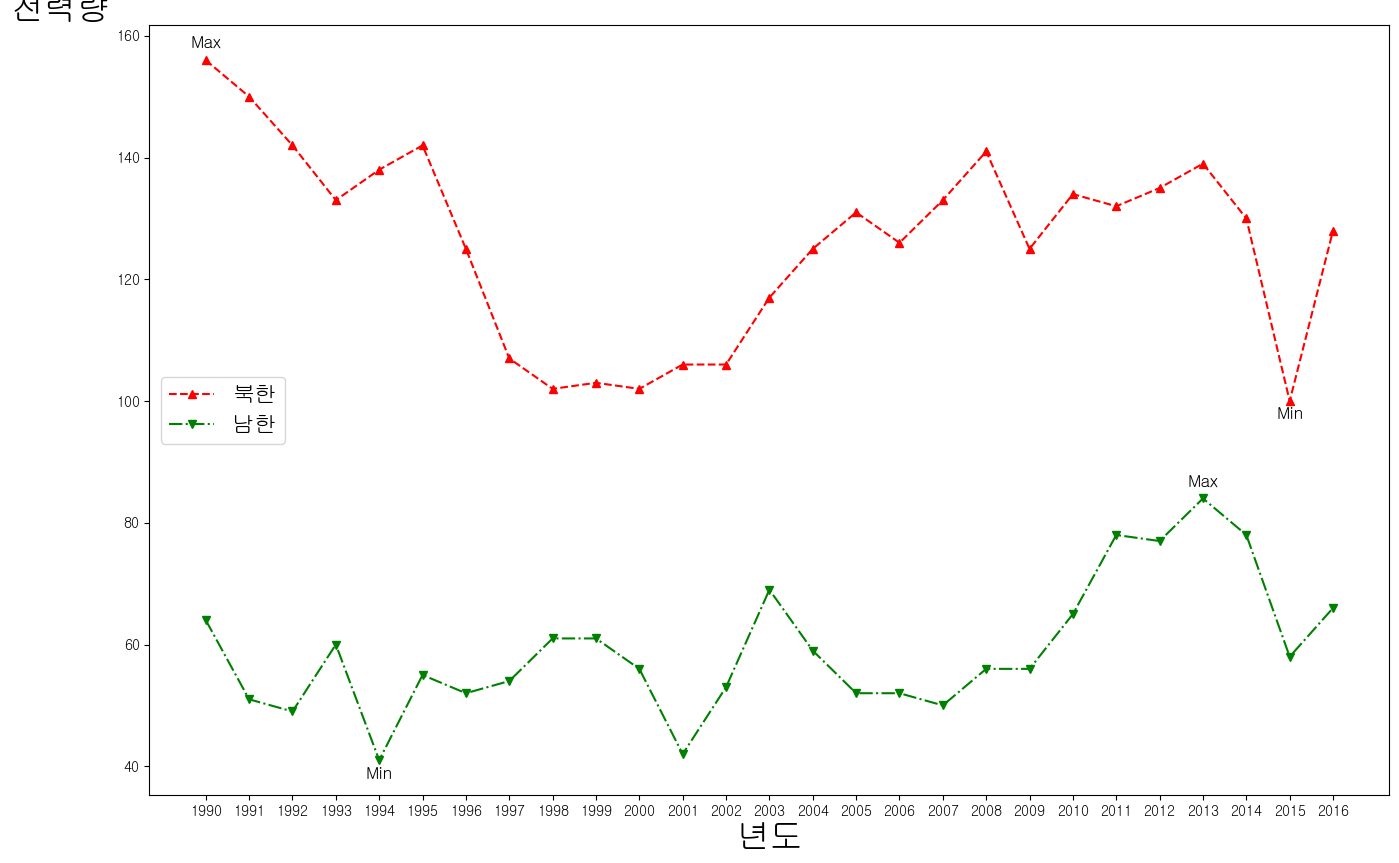

In [22]:
plt.figure(figsize=(16, 10))
plt.plot(x, yn, 'r^--', x, ys, 'gv-.')

plt.xlabel('년도', loc='center', fontsize=24)
plt.ylabel('전력량', loc='top', fontsize=24, rotation='horizontal')

plt.legend(['북한', '남한'], loc=6, fontsize=16)

plt.text(rwaterDF[rwaterDF['북한'] == waterDF.loc['북한'].max()].iloc[0]['년도'], waterDF.loc['북한'].max()+2, 'Max', ha='center', fontsize=12)
plt.text(rwaterDF[rwaterDF['북한'] == waterDF.loc['북한'].min()].iloc[0]['년도'], waterDF.loc['북한'].min()-3, 'Min', ha='center', fontsize=12)

plt.text(rwaterDF[rwaterDF['남한'] == waterDF.loc['남한'].max()].iloc[0]['년도'], waterDF.loc['남한'].max()+2, 'Max', ha='center', fontsize=12)
plt.text(rwaterDF[rwaterDF['남한'] == waterDF.loc['남한'].min()].iloc[0]['년도'], waterDF.loc['남한'].min()-3, 'Min', ha='center', fontsize=12)

(8) 심화작업

In [23]:
korpowerDF2

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        0     0     0     0     0     0     0     0     0     0   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        0     0     0     0     0     0     0     0     0     0   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     0     0     0     0     0    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     0     0     0     0     0     0     0     0     0   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        0  

[9 rows x 27 columns]

In [24]:
korpowerDF2.loc[('북한','신재생'),:] = 0  
korpowerDF2                                       

1990    1991    1992    1993    1994    1995    1996  \
전력량 (억㎾h) 발전 전력별                                                           
남한        합계      1077.0  1186.0  1310.0  1444.0  1650.0  1847.0  2055.0   
          수력        64.0    51.0    49.0    60.0    41.0    55.0    52.0   
          화력       484.0   573.0   696.0   803.0  1022.0  1122.0  1264.0   
          원자력      529.0   563.0   565.0   581.0   587.0   670.0   739.0   
          신재생        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
북한        합계       277.0   263.0   247.0   221.0   231.0   230.0   213.0   
          수력       156.0   150.0   142.0   133.0   138.0   142.0   125.0   
          화력       121.0   113.0   105.0    88.0    93.0    88.0    88.0   
          원자력        0.0     0.0     0.0     0.0     0.0     0.0     0.0   
          신재생        0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                    1997    1998    1999  ...    2007    2008    2009    2010  \
전력량 (억㎾h) 발전 전력별                          ...                                   
남한        합계      2244.0  2153.0  2393.0  ...  4031.0  4224.0  4336.0  4747.0   
          수력        54.0    61.0    61.0  ...    50.0    56.0    56.0    65.0   
          화력      1420.0  1195.0  1302.0  ...  2551.0  2658.0  2802.0  3196.0   
          원자력      771.0   897.0  1031.0  ...  1429.0  1510.0  1478.0  1486.0   
          신재생        0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
북한        합계       193.0   170.0   186.0  ...   236.0   255.0   235.0   237.0   
          수력       107.0   102.0   103.0  ...   133.0   141.0   125.0   134.0   
          화력        86.0    68.0    83.0  ...   103.0   114.0   110.0   103.0   
          원자력        0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   
          신재생        0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   

                    2011    2012    2013    2014    2015    2016  
전력량 (억㎾h) 발전 전력별                                                  
남한        합계      4969.0  5096.0  5171.0  5220.0  5281.0  5404.0  
          수력        78.0    77.0    84.0    78.0    58.0    66.0  
          화력      3343.0  3430.0  3581.0  3427.0  3402.0  3523.0  
          원자력     1547.0  1503.0  1388.0  1564.0  1648.0  1620.0  
          신재생        0.0    86.0   118.0   151.0   173.0   195.0  
북한        합계       211.0   215.0   221.0   216.0   190.0   239.0  
          수력       132.0   135.0   139.0   130.0   100.0   128.0  
          화력        79.0    80.0    82.0    86.0    90.0   111.0  
          원자력        0.0     0.0     0.0     0.0     0.0     0.0  
          신재생        0.0     0.0     0.0     0.0     0.0     0.0  

[10 rows x 27 columns]

In [25]:
korpowerDF2.index

MultiIndex([('남한',  '합계'),
            ('남한',  '수력'),
            ('남한',  '화력'),
            ('남한', '원자력'),
            ('남한', '신재생'),
            ('북한',  '합계'),
            ('북한',  '수력'),
            ('북한',  '화력'),
            ('북한', '원자력'),
            ('북한', '신재생')],
           names=['전력량 (억㎾h)', '발전 전력별'])

In [26]:
x = korpowerDF.columns

In [27]:
def checkIfTotal(col):
    if '합계' in col:
        return True
    else:
        return False

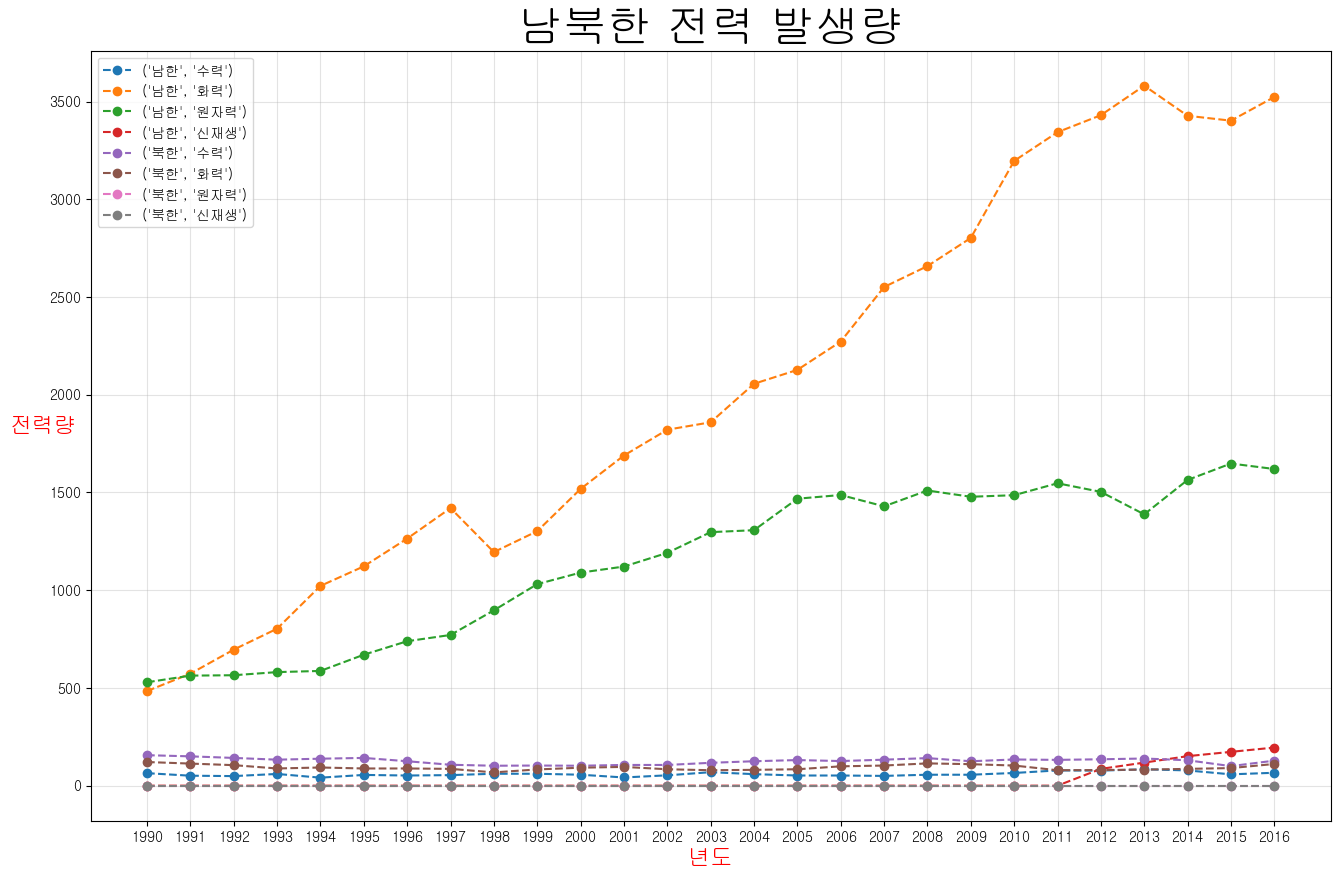

In [28]:
plt.figure(figsize=(16, 10))
for i in korpowerDF2.index:
    if checkIfTotal(i):
        continue
    plt.plot(x, korpowerDF2.loc[i], 'o--')

plt.xlabel('년도', fontsize=16, c='r')
plt.ylabel('전력량', fontsize=16, c='r', rotation='horizontal')

plt.title('남북한 전력 발생량', fontsize=32)
plt.legend([j for j in korpowerDF2.index if not checkIfTotal(j)])
plt.grid(alpha=0.35)
plt.show()

In [29]:
# 함수로 정의
def drawGph(dataframe):
    plt.figure(figsize=(16, 10))
    if type(dataframe) == pd.core.frame.DataFrame:
        for i in dataframe.index:
            if checkIfTotal(i):
                continue
            else:
                plt.plot(x, dataframe.loc[i], 'o--')
    
        plt.xlabel('년도', fontsize=16, c='r')
        plt.ylabel('전력량', fontsize=16, c='r', rotation='horizontal')
        
        plt.title('항목별 남북한 전력 발생량', fontsize=32)
        plt.legend([j for j in dataframe.index if not checkIfTotal(j)])
        plt.grid(alpha=0.35)
        plt.show()
    else:
        plt.plot(dataframe.index, dataframe.values, 'o--')
        
        plt.xlabel('년도', fontsize=16, c='r')
        plt.ylabel('전력량', fontsize=16, c='r', rotation='horizontal')
        
        plt.title('항목별 남북한 전력 발생량', fontsize=32)
        plt.legend(dataframe.name[1:])
        plt.grid(alpha=0.35)
        plt.show()

# def titleMaker(dataframe):
#     words = ' 전력 발생량'
#     if type(dataframe) == pd.core.frame.DataFrame:
#         return checkNS(dataframe.index)
#     else:
#         return str(dataframe.name[0]) + words

# def checkNS(index):
#     isNorth = False
#     isSouth = False
#     words = ' 전력 발생량'

#     for i in index:
#         print(i)
#         if '북한' in i:
#             isNorth = True
#         if '남한' in i:
#             isSouth = True

#     if isNorth and isSouth:
#         return '남북한' + words
#     elif isNorth:
#         return '북한' + words
#     elif isSouth:
#         return '남한' + words
#     else:
#         return '???' + words
    

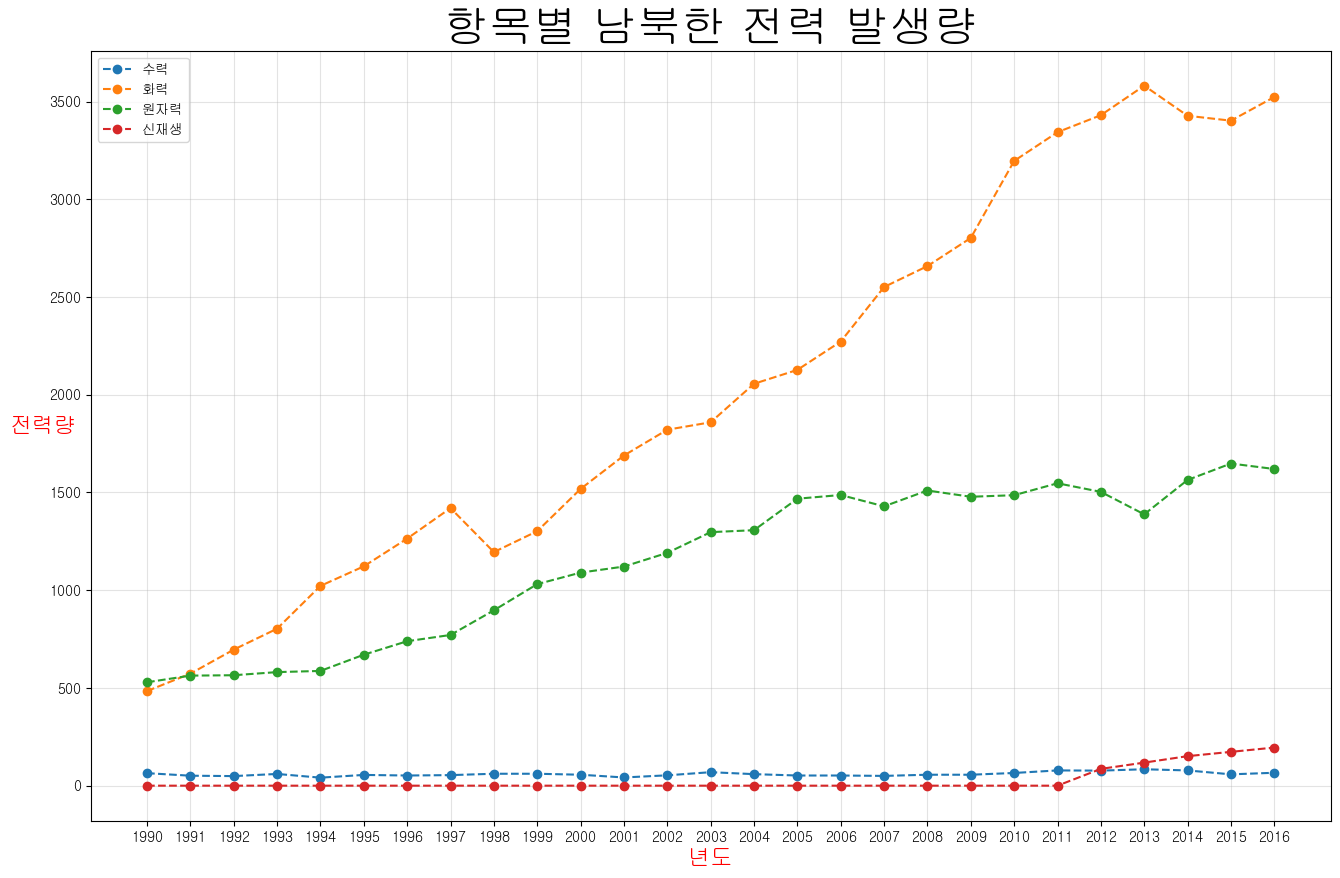

In [30]:
drawGph(korpowerDF2.loc['남한'])

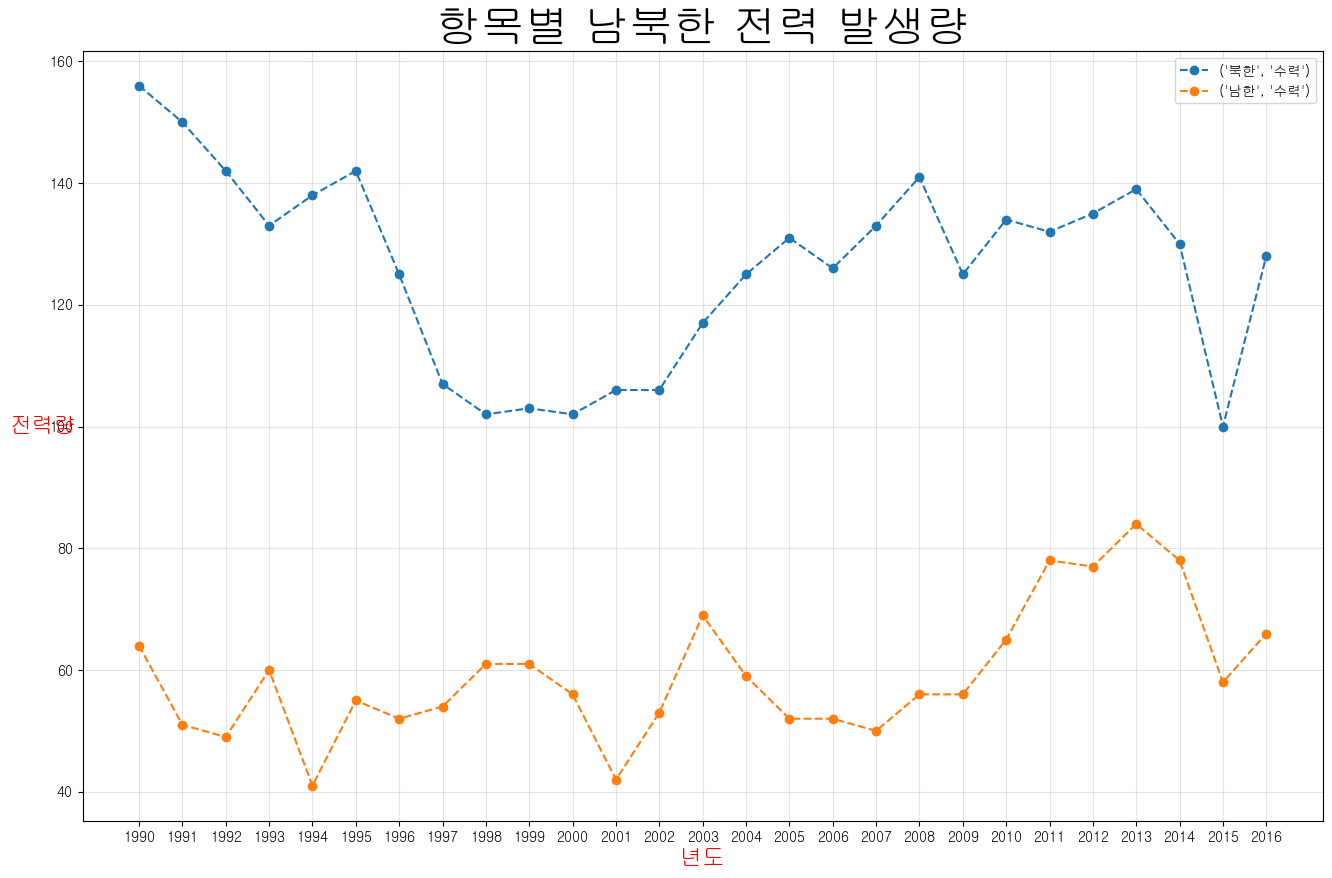

In [31]:
drawGph(korpowerDF2.loc[[('북한', '수력'), ('남한', '수력')]])

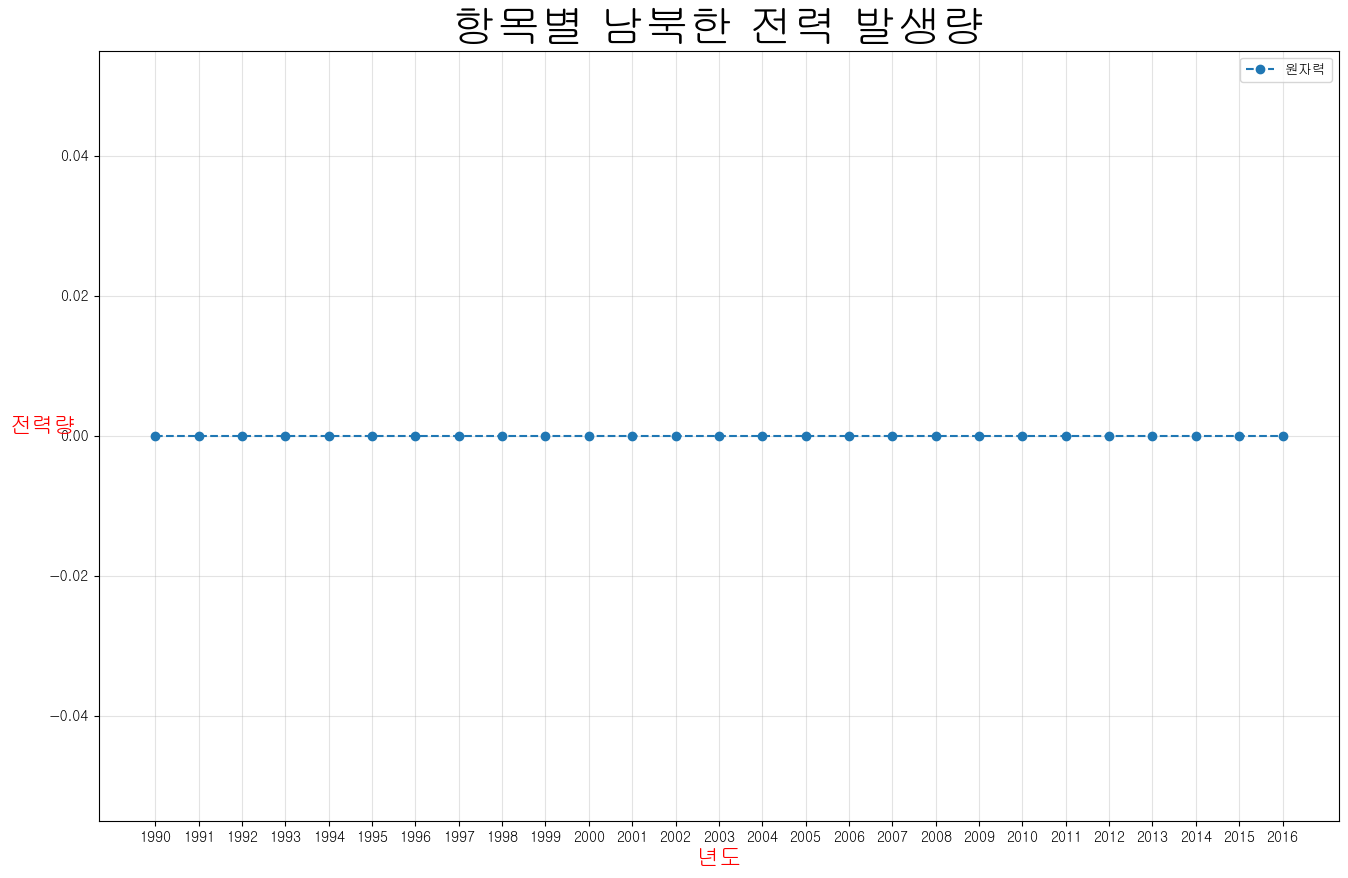

In [32]:
drawGph(korpowerDF2.loc[('북한', '원자력')])

In [33]:
korpowerDF2.loc[('남한', '수력')].name

('남한', '수력')

In [34]:
type(korpowerDF2.loc[('북한', '원자력')])

pandas.core.series.Series

In [35]:
type(korpowerDF2.loc[('북한', '원자력')]) == pd.core.series.Series

True

In [36]:
type(korpowerDF2.loc['북한']) == pd.core.series.Series

False

In [37]:
type(korpowerDF2.loc['북한'])

pandas.core.frame.DataFrame

In [38]:
type(korpowerDF2.loc['북한']) == pd.core.frame.DataFrame

True

In [50]:
def drawGph2(rows):
    dataframe = korpowerDF2.loc[rows]
    plt.figure(figsize=(16, 10))
    if type(dataframe) == pd.core.frame.DataFrame:
        for i in dataframe.index:
            if checkIfTotal(i):
                continue
            else:
                plt.plot(x, dataframe.loc[i], 'o--')
    
        plt.xlabel('년도', fontsize=16, c='r')
        plt.ylabel('전력량', fontsize=16, c='r', rotation='horizontal')
        
        plt.title(titleMaker(rows, dataframe), fontsize=32)
        plt.legend([j for j in dataframe.index if not checkIfTotal(j)])
        plt.grid(alpha=0.35)
        plt.show()
    else:
        plt.plot(dataframe.index, dataframe.values, 'o--')
        
        plt.xlabel('년도', fontsize=16, c='r')
        plt.ylabel('전력량', fontsize=16, c='r', rotation='horizontal')
        
        plt.title(titleMaker(rows, dataframe), fontsize=32)
        plt.legend(dataframe.name[1:])
        plt.grid(alpha=0.35)
        plt.show()

def titleMaker(rows, dataframe):
    words = ' 전력 발생량'
    if type(dataframe) == pd.core.frame.DataFrame:
        return checkNS(rows)
    else:
        return str(dataframe.name[0]) + words

def checkNS(rows):
    isNorth = False
    isSouth = False
    words = ' 전력 발생량'

    if type(rows) == type(''):
        return rows + words

    for i in rows:
        print(i)
        if '북한' in i:
            isNorth = True
        if '남한' in i:
            isSouth = True

    if isNorth and isSouth:
        return '남북한' + words
    elif isNorth:
        return '북한' + words
    elif isSouth:
        return '남한' + words
    else:
        return '???' + words

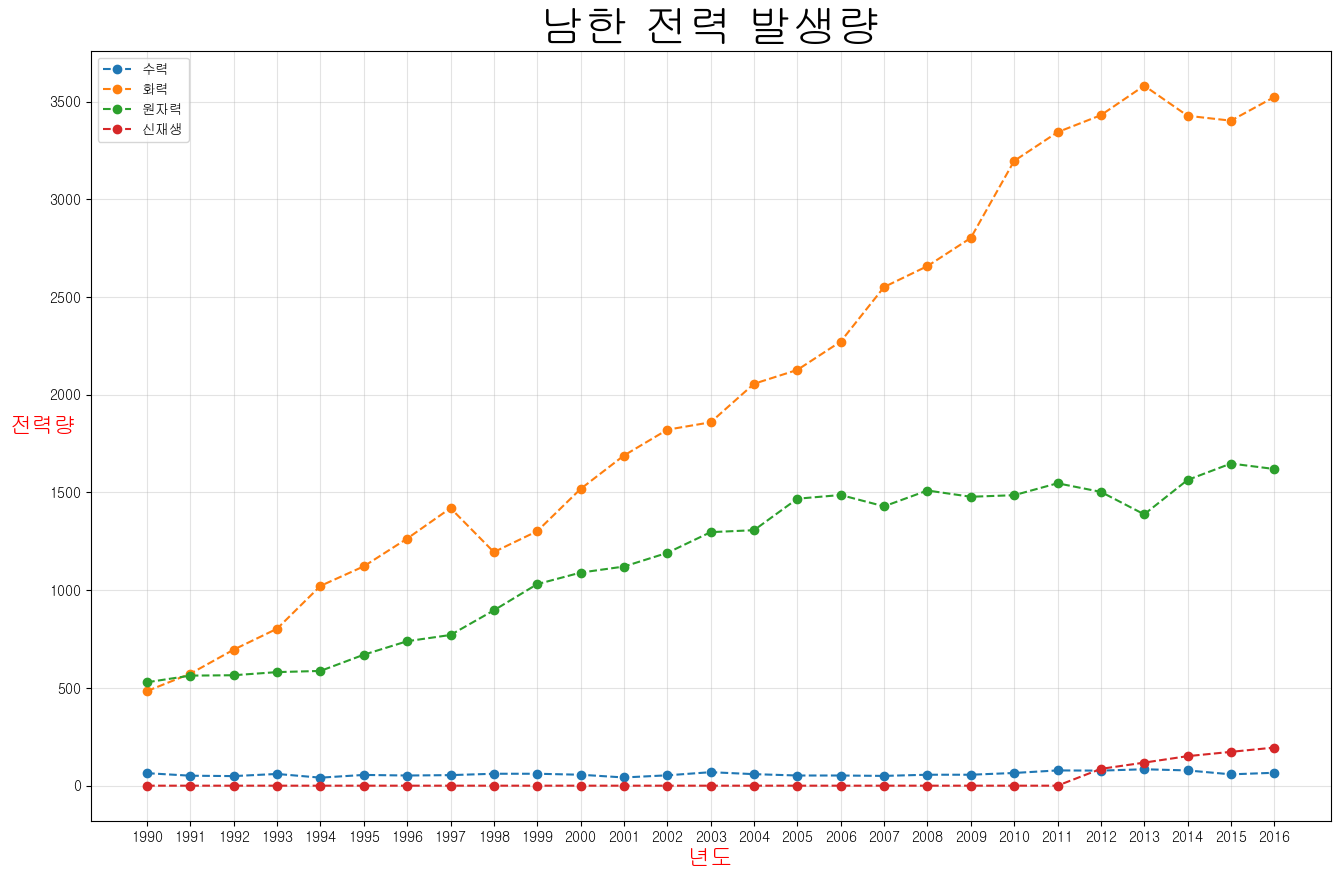

In [51]:
drawGph2('남한')

('북한', '화력')
('남한', '화력')


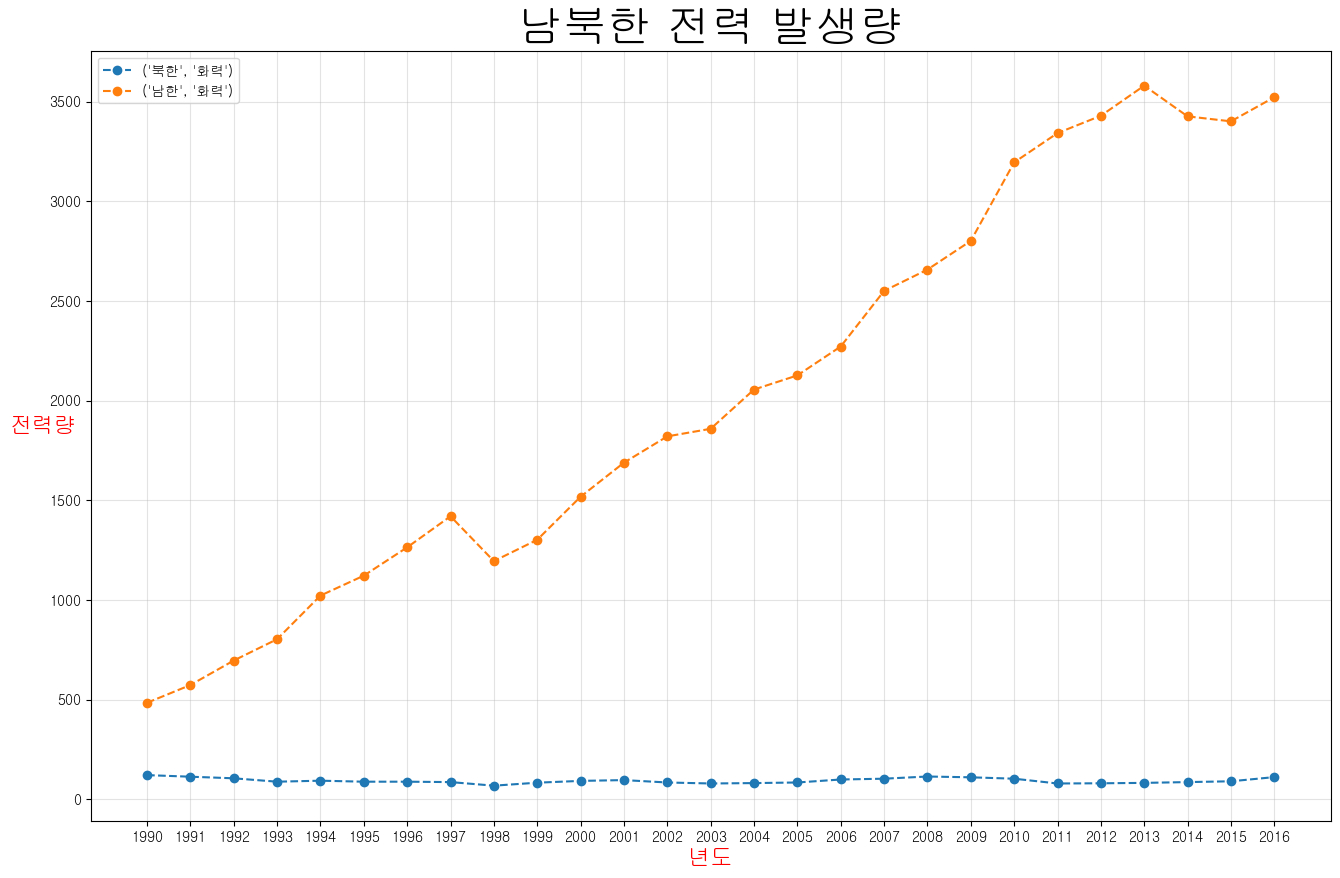

In [43]:
drawGph2([('북한', '화력'), ('남한', '화력')])

('남한', '원자력')
('남한', '화력')


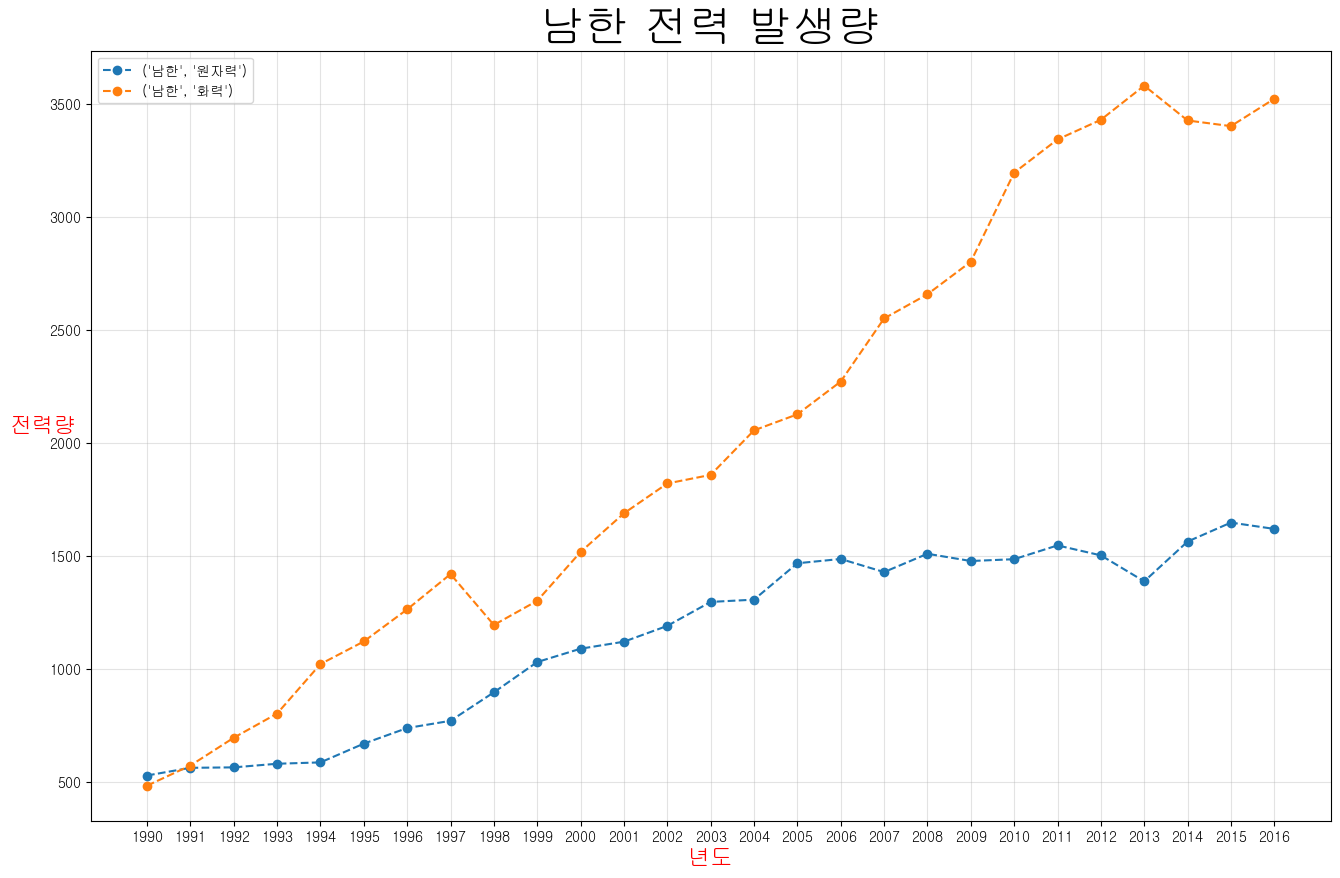

In [44]:
drawGph2([('남한', '원자력'), ('남한', '화력')])

('북한', '수력')
('북한', '화력')


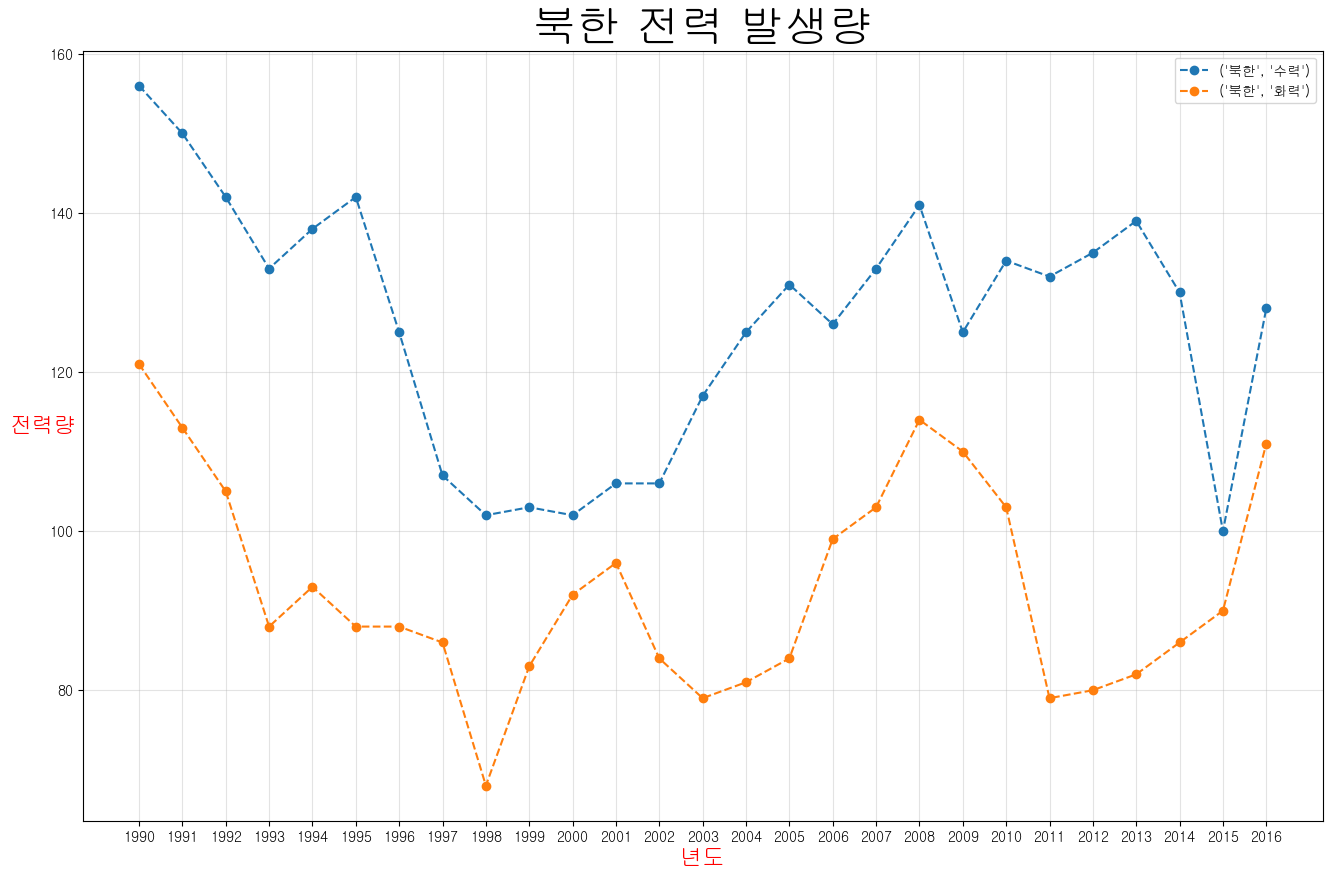

In [45]:
drawGph2([('북한', '수력'), ('북한', '화력')])

('북한', '수력')


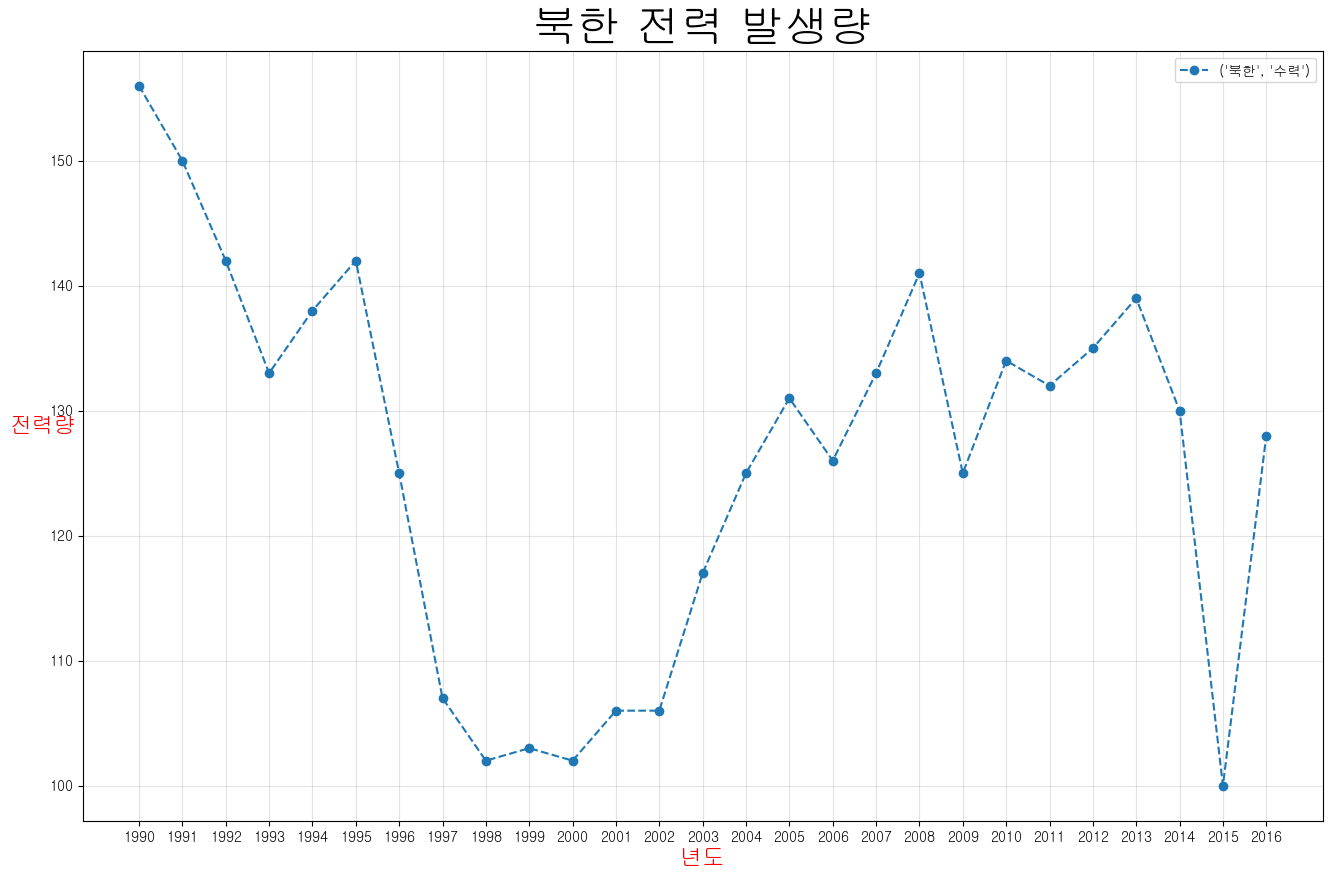

In [46]:
drawGph2([('북한', '수력')])

('남한', '신재생')


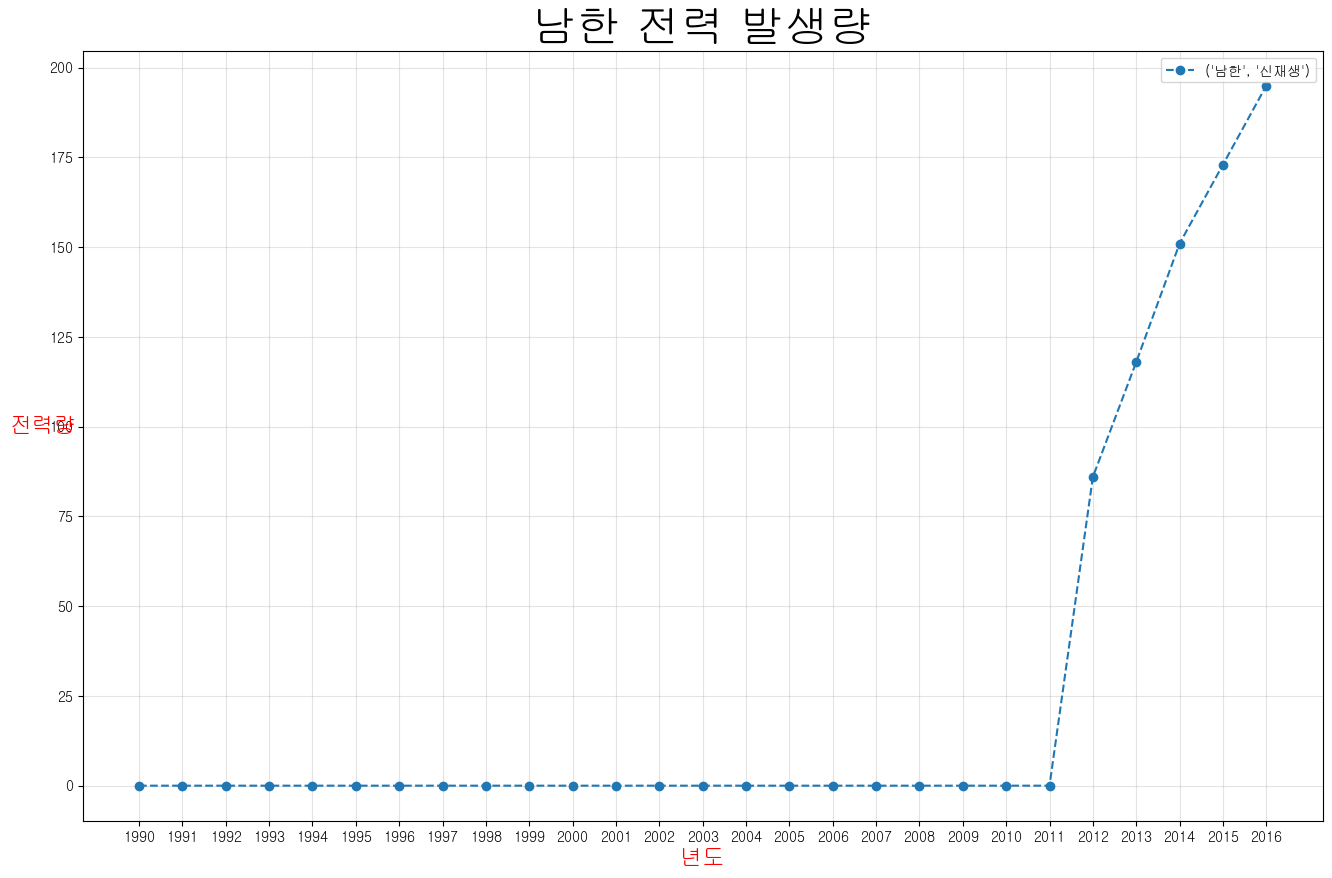

In [47]:
drawGph2([('남한', '신재생')])